In [ ]:
# importing some basic libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [2]:
X, Y = make_blobs(n_samples = 40,centers=2, cluster_std=1.2,n_features=2,random_state=42)
Y = np.where(Y<=0,-1,1)
Y[:10]

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

In [3]:
#prepare datasets
#test sets
x_test = X[20:]
x_test = np.c_[x_test,np.ones(len(x_test))]
y_test = Y[20:]

#training sets
x = X[:20]
y = Y[:20]
#group for plotting
df_train = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
grouped_train = df_train.groupby('label')

#add bias to sample vectors
x = np.c_[x,np.ones(len(x))]

#initialize weight vector
w = np.zeros(len(x[0]))

In [4]:
#learning rate 
lam = 0.001
#array of number for shuffling
order = np.arange(0,len(x),1)

margin_current = 0
margin_previous = -10

pos_support_vectors = 0
neg_support_vectors = 0

not_converged = True
t =0 

while(not_converged):
    margin_previous = margin_current
    t += 1
    pos_support_vectors = 0
    neg_support_vectors = 0
    
    eta = 1/(lam*t)
    fac = (1-(eta*lam))*w
    random.shuffle(order)
    for i in order:  
        prediction = np.dot(x[i],w)
        
        #check for support vectors
        if (round((prediction),1) == 1):
            pos_support_vectors += 1
            #pos support vec found
        if (round((prediction),1) == -1):
            neg_support_vectors += 1
            #neg support vec found
            
        #misclassification
        if (y[i]*prediction) < 1 :
            w = fac + eta*y[i]*x[i]            
        #correct classification
        else:
            w = fac
            
    if(t>10000):    
        margin_current = np.linalg.norm(w)
        if((pos_support_vectors > 0)and(neg_support_vectors > 0)and((margin_current - margin_previous) < 0.01)):
            not_converged = False

In [5]:
#create grid to draw decision boundary
grid_res = 200
xline = np.linspace(min(X[:,0]-(0.5*np.std(X[:,0]))),max(X[:,0]+(0.5*np.std(X[:,0]))),grid_res)
yline = np.linspace(min(X[:,1]-(0.5*np.std(X[:,1]))),max(X[:,1]+(0.5*np.std(X[:,1]))),grid_res)
grid = []
gridy = []
for i in range(grid_res):
    for j in range(grid_res):
        grid.append([xline[i],yline[j]])
        if (np.dot(w,[xline[i],yline[j],1]))>1:
            gridy.append((138/255,43/255,226/255,0.1))
            #gridy.append('lightsteelblue')
        elif (np.dot(w,[xline[i],yline[j],1]))<-1:
            gridy.append((0,100/255,0,0.1))
            #gridy.append('steelblue')
        elif (round((np.dot(w,[xline[i],yline[j],1])),2) == 0):
            gridy.append((0,0,0,1))
        else:
            gridy.append((245/255,245/255,245/255))
            
grid = np.asarray(grid)
gridy = np.asarray(gridy)

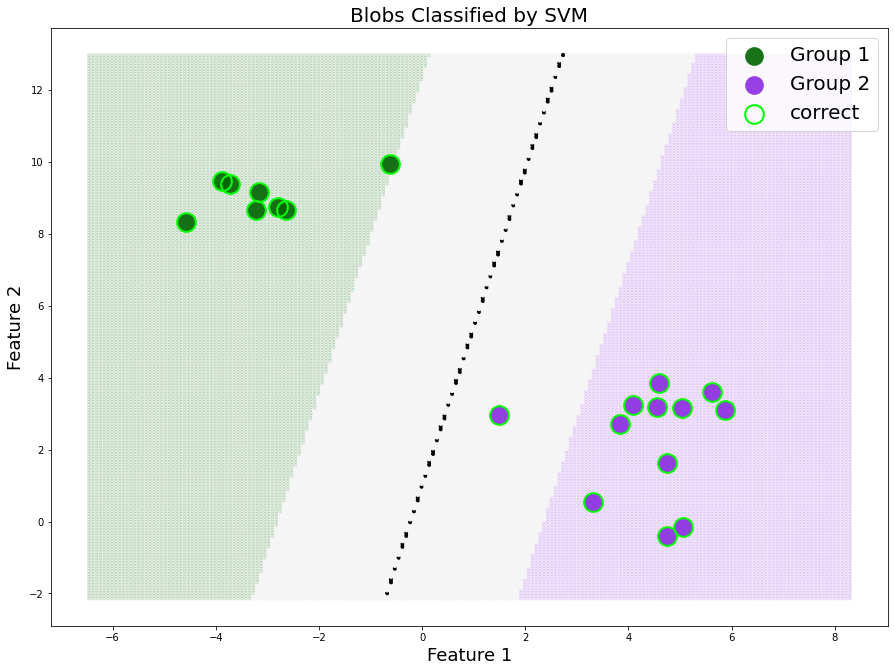

In [6]:
#test classifier on test set
y_pred = ([])
for i in x_test:
    pred = np.dot(w,i)
    if(pred > 0):
        {y_pred.append(1)}
    elif(pred < 0):
        y_pred.append(-1)
        

y_pred_labels =([])
for i,val in enumerate(y_pred):
    if(y_test[i] == y_pred[i]):
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)
        
#group for plotting
colors = {-1:(0,100/255,0,0.9), 1:(138/255,43/255,226/255,0.9)}
names = {-1:'Group 1', 1:'Group 2'}
df_test = pd.DataFrame(dict(x=x_test[:,0], y=x_test[:,1], pred=y_pred_labels,label=y_test))
grouped_test = df_test.groupby('label')
grouped_pred = df_test.groupby('pred') 
pred_colors = {1:'lime', 0:'red'}
pred_names = {1:'correct',0:'incorrect'}

#plot decision grid with prediction values
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("Feature 1", fontsize=18)
ax.set_ylabel("Feature 2", fontsize=18)
ax.scatter(grid[:,0], grid[:, 1], marker='o',c=gridy,s=10)
for key, group in grouped_test:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolor=(0,0,0,0),s=350)
for key, group in grouped_pred:
    ax.scatter(group.x,group.y,label=pred_names[key],color=(0,0,0,0),linewidth=2,edgecolor=pred_colors[key],s=350)
ax.legend(markerscale=1,fontsize=20,fancybox=True)
plt.show()